## ADVANCED USE OF RNN MODELS

In [1]:
#imports

# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np  #for vector operation
import string   # provides strings variations for character embedding
import os

# keras imports
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
display(Markdown("## TEMPERATURE FORECASTING PROBLEM"))

display(Markdown("### PROBLEM STATEMENT"))
print ("""
Given data going as far back as lookback timesteps (a timestep is 10 minutes) and 
sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 1440, i.e. our observations will go back 10 days.
steps = 6, i.e. our observations will be sampled at one data point per hour. 
delay = 144, i.e. our targets will be 24 hour in the future.

""")

display(Markdown("### TRAINING DATA "))

data_dir = './jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv') # path to the data

# reading the data file
f = open(fname)
data = f.read()
f.close()

# reading the headers and the content
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

display(Markdown("### Data summary \n"))
print ("\nData contains {} columns\n".format(len(header)))
print(header)

print("\nData has {} samples for training and testing\n".format(len(lines)))
print("3 sample data points")
print(lines[:3])

#data pre-processing
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]] # omiting first column date & time
    float_data[i, :] = values

print("\nconverting data to numpy array(omiting first column date & time)\n")
print (float_data[:3])
print("\ndata shape: rows {}, columns {}\n".format(float_data.shape[0],float_data.shape[1]))

## TEMPERATURE FORECASTING PROBLEM

### PROBLEM STATEMENT


Given data going as far back as lookback timesteps (a timestep is 10 minutes) and 
sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 1440, i.e. our observations will go back 10 days.
steps = 6, i.e. our observations will be sampled at one data point per hour. 
delay = 144, i.e. our targets will be 24 hour in the future.




### TRAINING DATA 

### Data summary 



Data contains 15 columns

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']

Data has 420551 samples for training and testing

3 sample data points
['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30', '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10', '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60']

converting data to numpy array(omiting first column date & time)

[[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02

## PLOTTING TEMP VS TIME

### temperature plot across years & 10 days

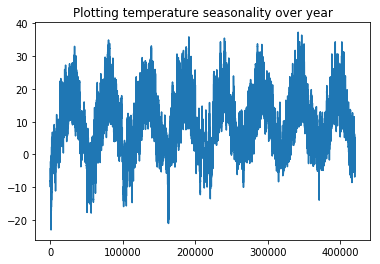

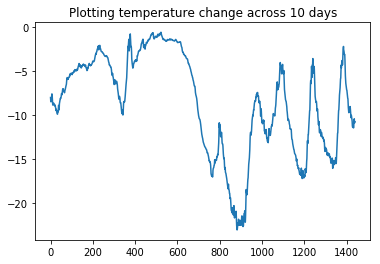

In [3]:
display(Markdown("## PLOTTING TEMP VS TIME"))

temp = float_data[:, 1]  # temperature (in degrees Celsius)

display(Markdown("### temperature plot across years & 10 days"))

# plotting temperature across years
plt.plot(range(len(temp)), temp)
plt.title('Plotting temperature seasonality over year')

plt.figure()

#plotting temperature for first 10 days collected every 10 mins a day(144 data points/day)
plt.plot(range(1440), temp[:1440])
plt.title('Plotting temperature change across 10 days')
plt.show()

In [4]:
display(Markdown("## DATA PREPARATION"))

# pre-processing
display(Markdown("### data normalization"))

print("\n data before normalization\n")
print (float_data[:3])

float_data_ = float_data
mean = float_data_[:200000].mean(axis=0) # calcaulating mean of first 200K samples for each columns
float_data_ -= mean  # substracting the mean from each element in the column
std = float_data_[:200000].std(axis=0) # calcaulating standard deviation of first 200K samples  for each columns
float_data_ /= std  # normalizing each element in the column with the standard deviation of the columns

print("\n data after normalization\n")
print (float_data[:3])
print("\n data shape: rows {}, columns {}\n".format(float_data.shape[0],float_data.shape[1]))

## DATA PREPARATION

### data normalization


 data before normalization

[[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02000e+00  2.10000e-01  1.89000e+00  3.03000e+00
   1.30980e+03  7.20000e-01  1.50000e+00  1.36100e+02]
 [ 9.96530e+02 -8.51000e+00  2.64910e+02 -9.31000e+00  9.39000e+01
   3.21000e+00  3.01000e+00  2.00000e-01  1.88000e+00  3.02000e+00
   1.31024e+03  1.90000e-01  6.30000e-01  1.71600e+02]]

 data after normalization

[[ 0.90014748 -1.93135845 -1.98211036 -1.86280029  1.07285236 -1.30742164
  -1.47375773 -0.79868641 -1.4762674  -1.47815522  2.12375056 -0.72950452
  -0.78067973 -0.27613603]
 [ 0.9060434  -1.97541381 -2.02567    -1.91582958  1.07883061 -1.32042698
  -1.4951961  -0.80075238 -1.49502455 -1.49932141  2.17199852 -0.93124017
  -0.88794488 -0.46317443]
 [ 0.90132666 -1.98671006

In [ ]:
#creating a custom generator (prepares training, validation and test data as per problem statement)
#Now here is the data generator that we will use. It yields a tuple (samples, targets) 
#where samples is one batch of input data and targets is the corresponding array of target temperatures

"""
data: The original array of floating point data, which we just normalized in the code snippet above.

lookback(measured in timesteps) : How many timesteps back should our input data go. 

delay(measured in timesteps) : How many timesteps in the future should our target be. 

min_index and max_index: Indices in the data array that delimit which timesteps to draw from. 
This is useful for keeping a segment of the data for validation and another one for testing.

shuffle: Whether to shuffle our samples or draw them in chronological order. 

batch_size: The number of samples per batch.

step(measured in timesteps) : The period, in timesteps, at which we sample data. 
We will set it 6 in order to draw one data point every hour 
"""

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:

            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
            
        yield samples, targets

In [ ]:
display(Markdown("## lets underatand this data preparation w.r.t problem statement"))

lookback = 1440
step = 6
delay = 144
batch_size = 128

# sample generator for understanding the data preparation
undertansing_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

print ("""
Problem statement:
Given data going as far back as lookback timesteps (a timestep is 10 minutes) and 
sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 1440, i.e. our observations will go back 10 days.
steps = 6, i.e. our observations will be sampled at one data point per hour. 
delay = 144, i.e. our targets will be 24 hour in the future.

Variable understanding:
lookback = 1440 timesteps (1 timesteps == 10 minutes)
Therefore lookback = 1440 * 10 minutes
i.e lookback = (1440 * 10)/60 hours
i.e lookback = (1440 * 10)/(60*24) days = 10 days


similarly,

step = 6 timestamp = 6 * 10 minutes = 1 hour  
delay = 144 timestamps = (144*10)/(60*24) = 1 day

""")

print ("""Note: to understand the concept of yield and generator.
visit: https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do
""")

print ("""Understanding first batch\n""")
for value in undertansing_gen:
    first_batch_samples, first_batch_target = value
    break

print ("First batch data sample shape is {}".format(first_batch_samples.shape))
print ("""128 : batch-size
240 : number of sample collected (in lookback timestamp's 10 days). 
Note: Not all 1440 sample colleted, only (timestamps in lookback)/(steps) = 1440/6 = 240 
14  : number of columns in data """)

display(Markdown("### 1 data sample"))
print (first_batch_samples[0])

print ("\nFirst batch target shape is {}".format(first_batch_target.shape))
print ("""128 : '128' temperature values for each batch.
Note: temperature values 1 day ahead in furture(as per delay = 1 day) are collected """)
display(Markdown("### 5 target sample"))
print (first_batch_target[:4])

## lets underatand this data preparation w.r.t problem statement


Problem statement:
Given data going as far back as lookback timesteps (a timestep is 10 minutes) and 
sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 1440, i.e. our observations will go back 10 days.
steps = 6, i.e. our observations will be sampled at one data point per hour. 
delay = 144, i.e. our targets will be 24 hour in the future.

Variable understanding:
lookback = 1440 timesteps (1 timesteps == 10 minutes)
Therefore lookback = 1440 * 10 minutes
i.e lookback = (1440 * 10)/60 hours
i.e lookback = (1440 * 10)/(60*24) days = 10 days


similarly,

step = 6 timestamp = 6 * 10 minutes = 1 hour  
delay = 144 timestamps = (144*10)/(60*24) = 1 day


Note: to understand the concept of yield and generator.
visit: https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do

Understanding first batch

First batch data sample shape is (128, 240, 14)
128 : batch-size
240 : number of sample

### 1 data sample

[[-0.30615873  0.53800074  0.55775178 ... -1.23058983 -1.26122763
   0.91074962]
 [-0.32030895  0.41939016  0.44047582 ... -0.98330098 -1.04669731
   0.52743636]
 [-0.34153428  0.22057625  0.24501589 ... -0.22841922 -0.56614942
   0.52743636]
 ...
 [-1.33087045  1.30049729  1.39767101 ...  0.51995494  0.93556276
  -1.00466215]
 [-1.34973741  0.97290618  1.07264907 ...  1.80195242  1.74219673
  -1.54834352]
 [-1.30492838  0.83170311  0.92856718 ... -0.17635841  0.50650214
  -1.49488749]]

First batch target shape is (128,)
128 : '128' temperature values for each batch.
Note: temperature values 1 day ahead in furture(as per delay = 1 day) are collected 


### 5 target sample

[-0.17931083 -0.33858789  0.70292592  0.45214928]


In [ ]:
display(Markdown("### preparing the training, validation and test generators"))

print ("""
the training generator looks at the first 200,000 timesteps, 
the validation generator looks at the following 100,000, & 
the test generator looks at the remainder
""")

lookback = 1440
step = 6
delay = 144
batch_size = 128

#training data preparation
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# This is how many batches to draw from `val_gen`
# in order to see the whole validation set:
val_batches = (300000 - 200001 - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_batches = (len(float_data) - 300001 - lookback) // batch_size

print ("Number of batches in training: {}".format((200000-lookback)//batch_size))
print ("Number of batches in validation: {}".format(val_batches))
print ("Number of batches in testing: {}".format(test_batches))

### preparing the training, validation and test generators


the training generator looks at the first 200,000 timesteps, 
the validation generator looks at the following 100,000, & 
the test generator looks at the remainder

Number of batches in training: 1551
Number of batches in validation: 769
Number of batches in testing: 930


In [ ]:
display(Markdown("### creating non-machine learning baseline"))

# implementation of baseline model
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_batches):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    return(np.mean(batch_maes))
    
print ("""the temperature timeseries can safely be assumed to be continuous 
(the temperatures tomorrow are likely to be close to the temperatures today) 
as well as periodical with a daily period. Thus a common sense approach would be to always 
predict that the temperature 24 hours from now will be equal to the temperature right now
""")

mae = evaluate_naive_method()
print ("baseline yields a MAE of %.2f\n"%(mae))

print ("""Since our temperature data has been normalized to be centered on 0 
and have a standard deviation of one, this number is not immediately interpretable. 
It translates to an average absolute error of 0.29 * temperature_std degrees Celsius, i.e. 2.57°C
""")

celsius_mae = 0.29 * std[1]
print ("temperature deviation in baseline %.2f°C"%(celsius_mae))

### creating non-machine learning baseline

the temperature timeseries can safely be assumed to be continuous 
(the temperatures tomorrow are likely to be close to the temperatures today) 
as well as periodical with a daily period. Thus a common sense approach would be to always 
predict that the temperature 24 hours from now will be equal to the temperature right now

baseline yields a MAE of 0.29

Since our temperature data has been normalized to be centered on 0 
and have a standard deviation of one, this number is not immediately interpretable. 
It translates to an average absolute error of 0.29 * temperature_std degrees Celsius, i.e. 2.57°C

temperature deviation in baseline 2.57°C


In [ ]:
def plot_model_training_history(history,accuracy = True):
    
    #collecting all post-training values 
    if accuracy:
        acc = history.history['acc']
        val_acc = history.history['val_acc']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    # ploting losses
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    
    if accuracy:
        # ploting accuracies
        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()
    return

### Training and evaluating a densely-connected model using the data generators

starting model training...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 9s 18ms/step - loss: 1.4931 - val_loss: 0.8024
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.4354 - val_loss: 0.3186
Epoch 3/20
500/500 [==============================] - 9s 17ms/step - loss: 0.2897 - val_loss: 0.3116
Epoch 4/20
500/500 [==============================] - 9s 18ms/step -

### result

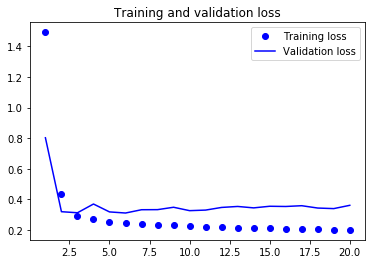

<Figure size 432x288 with 0 Axes>

In [ ]:
display(Markdown("### Training and evaluating a densely-connected model using the data generators"))

print("starting model training...")
# model architecture and training
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
print ("\n")
model.summary()
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_batches)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history,accuracy=False)

In [ ]:
display(Markdown("### Training and evaluating a GRU-based model"))

print("starting model training...")
# model architecture and training
model = Sequential()
model.add(layers.GRU(32,dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
model.summary()
print("\n")
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_batches)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history,accuracy=False)

### Training and evaluating a GRU-based model

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                4512      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
500/500 [==============================] - 436s 872ms/step - loss: 0.3378 - val_loss: 0.2766
Epoch 2/20
500/500 [==============================] - 430s 861ms/step - loss: 0.3155 - val_loss: 0.2736
Epoch 3/20
500/500 [==============================] - 426s 852ms/step - loss: 0.3081 - val_loss: 0.2699
Epoch 4/20
500/500 [==============================] - 424s 849ms/step - loss: 0.3022 - val_loss: 0.2658
Epoch 5/20
500/500 [==============================] - 424s 849ms/step - loss: 0.3007 - val_

In [ ]:
display(Markdown("### Stacking recurrent layers"))

print("starting model training...")
# model architecture and training
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
print("\n")
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_batches)

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history,accuracy=False)